Objective: To form different clusters of customer according to their Age, Annual Income and Spending Score

In [1]:
#Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
data=pd.read_csv("D:\dhanashree\Management Internship Program\Datasets_MIP_PGDM_Ti 6_2020-22\Mall_Customers_Analysis.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#dropping unwanted column
data=data.drop('CustomerID',axis=1)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
data.shape

(200, 4)

In [6]:
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

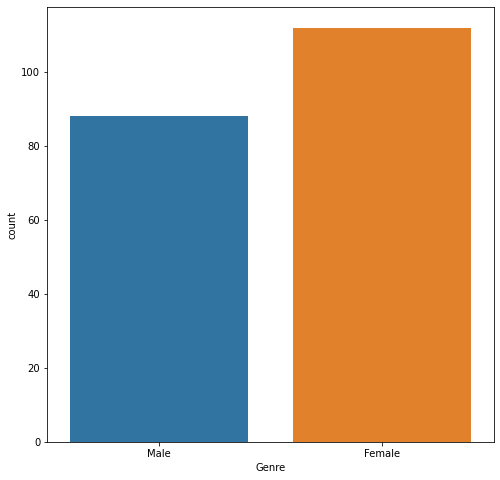

In [7]:
plt.figure(figsize=(8,8))
sns.countplot(data=data, x='Genre')

([<matplotlib.patches.Wedge at 0x1a806b01940>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.2248575863318331, -1.1787446991902115, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.00%'),
  Text(0.13116692536023597, -0.6876010745276234, '44.00%')])

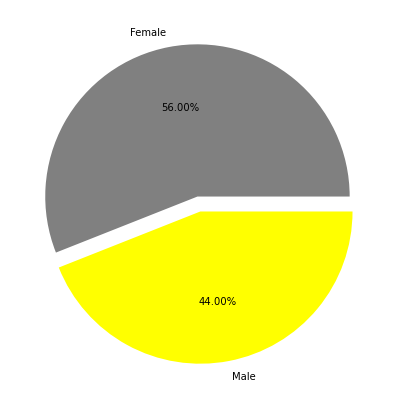

In [8]:
plt.figure(figsize=(7,7))
labels = ['Female', 'Male']
size = data['Genre'].value_counts()
colors = ['grey', 'yellow']
explode = [0, 0.1]
plt.pie(size, colors = colors, explode = explode, labels = labels, autopct = '%.2f%%')

In [9]:
data['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

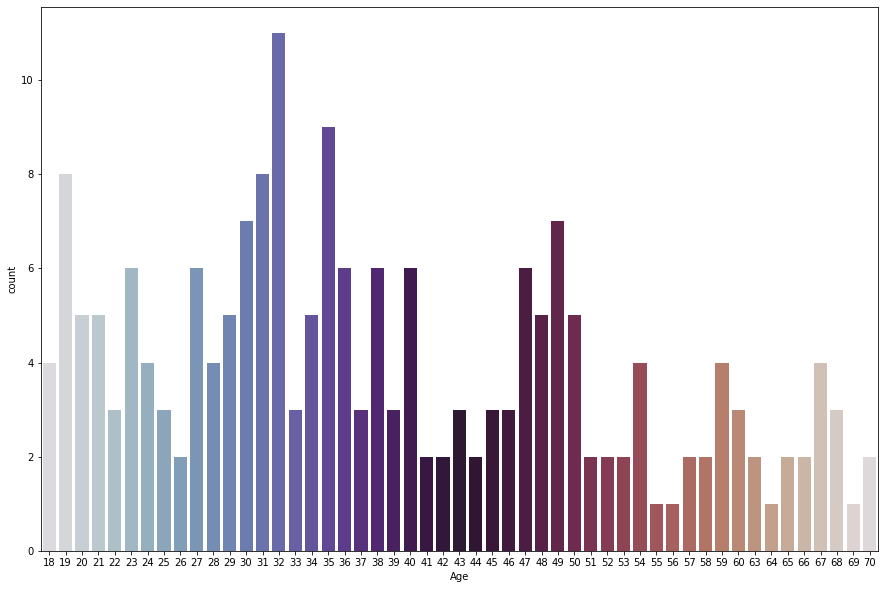

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(data['Age'], palette = 'twilight')

In [11]:
data['Annual Income (k$)'].value_counts()

54     12
78     12
60      6
87      6
62      6
       ..
61      2
126     2
59      2
58      2
15      2
Name: Annual Income (k$), Length: 64, dtype: int64

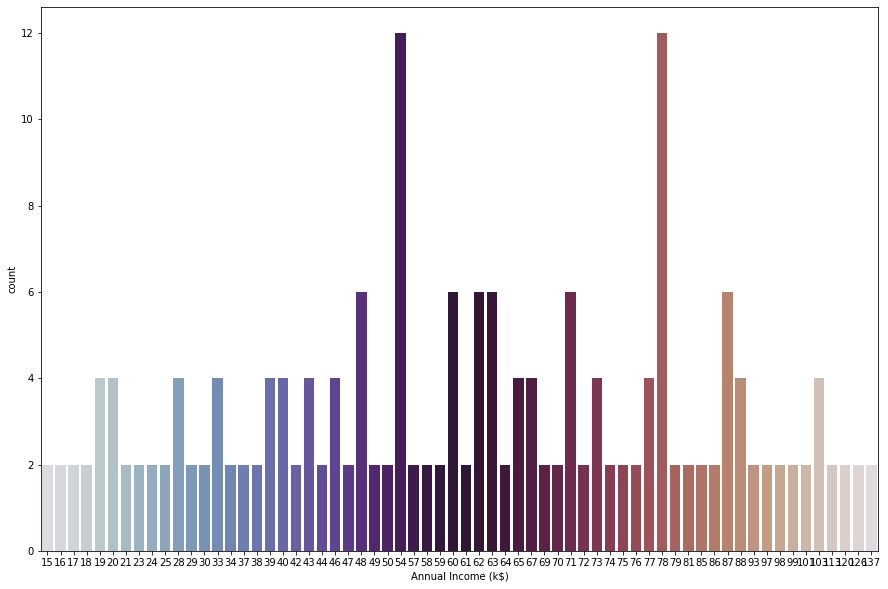

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(data['Annual Income (k$)'], palette = 'twilight')

In [13]:
data['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
82    1
24    1
23    1
99    1
Name: Spending Score (1-100), Length: 84, dtype: int64

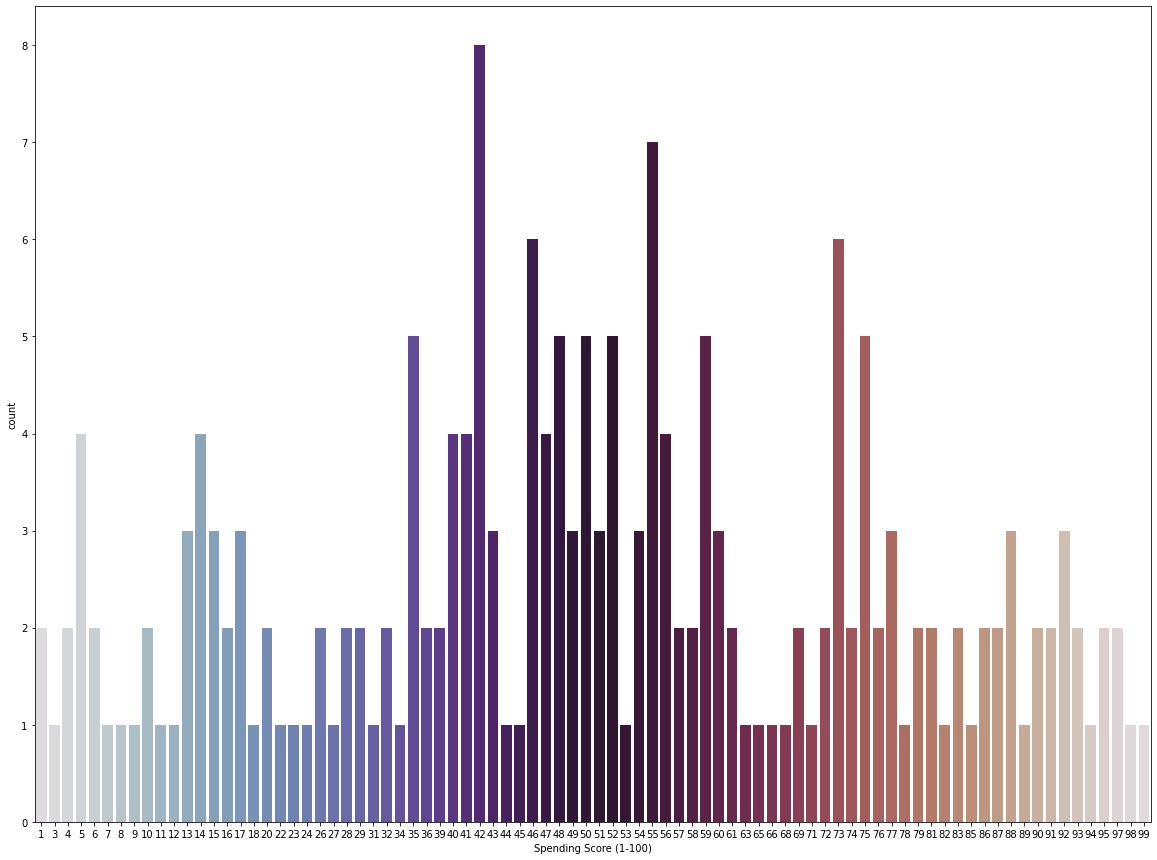

In [14]:
plt.figure(figsize=(20,15))
sns.countplot(data['Spending Score (1-100)'], palette ='twilight')

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [16]:
data.describe(include='O').T

,count,unique,top,freq
Genre,200,2,Female,112


In [17]:
data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


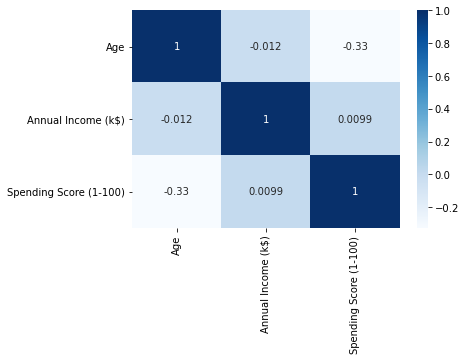

In [18]:
sns.heatmap(data.corr(), cmap = 'Blues', annot = True)

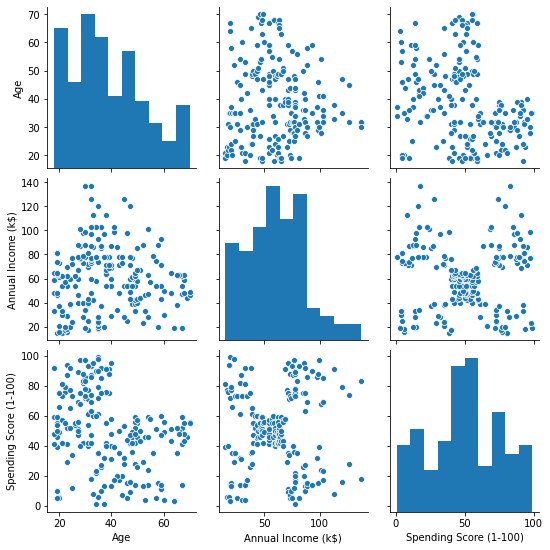

In [19]:
sns.pairplot(data)

In [20]:
data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [21]:
X=data[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


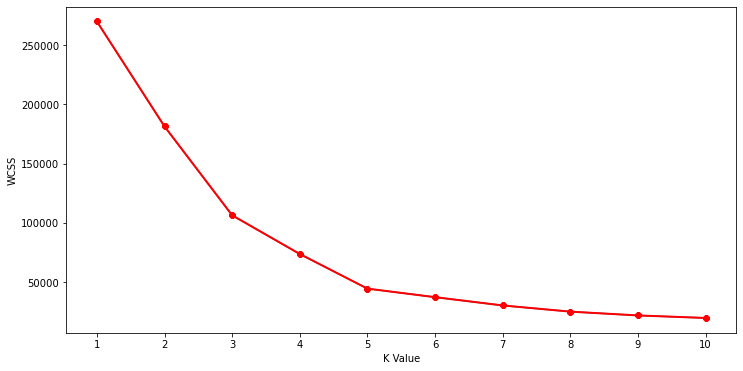

In [23]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [24]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


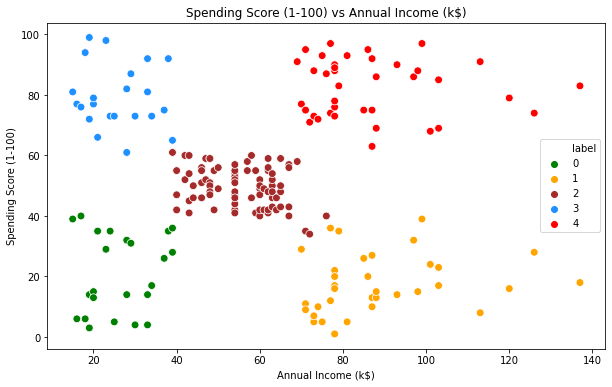

In [25]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = data  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [26]:
X1=data[['Age','Spending Score (1-100)']]
X1.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [27]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X1)
    wcss.append(km.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


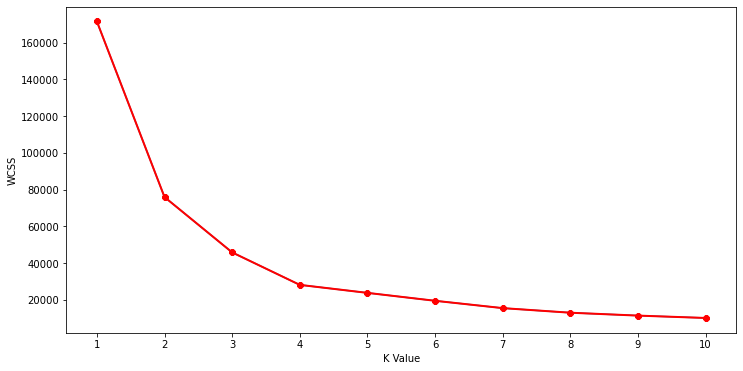

In [28]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [29]:
#Taking 3 clusters
km1=KMeans(n_clusters=3)
#Fitting the input data
km1.fit(X1)
#predicting the labels of the input data
y=km1.predict(X1)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,1
1,Male,21,15,81,0
2,Female,20,16,6,2
3,Female,23,16,77,0
4,Female,31,17,40,1


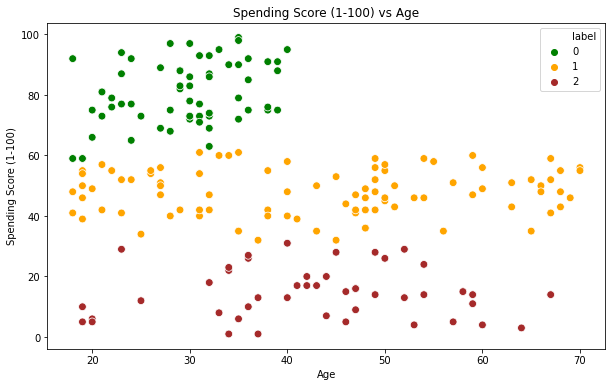

In [30]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown'], legend='full',data = data  ,s = 60 )
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Age')
plt.show()

In [31]:
X2=data[['Annual Income (k$)','Age']]
X2.head()

,Annual Income (k$),Age
0,15,19
1,15,21
2,16,20
3,16,23
4,17,31


In [32]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X2)
    wcss.append(km.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


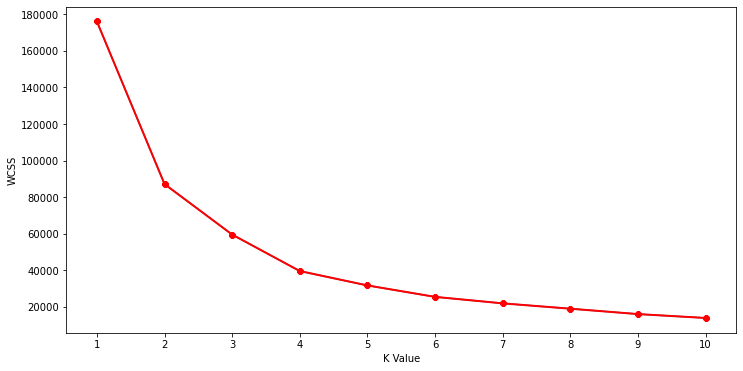

In [33]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [34]:
#Taking 4 clusters
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(X2)
#predicting the labels of the input data
y=km1.predict(X2)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


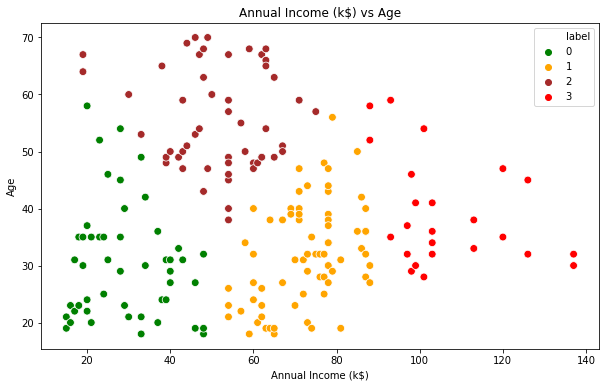

In [35]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Age',hue="label",  
                 palette=['green','orange','brown','red'], legend='full',data = data  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age') 
plt.title('Annual Income (k$) vs Age')
plt.show()